# Setting things up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Allergies.csv

Parameters :

START = The date the allergy was diagnosed.

STOP = The date the allergy ended, if applicable.

PATIENT = Foreign key to the Patient. (Consider it as an ID)

ENCOUNTER = Foreign key to the Encounter when the allergy was diagnosed.

CODE = Allergy code from SNOMED-CT (SNOMED-CT provides code to medical terms)

DESCRIPTION = Description of the Allergy

In [ ]:
# peeking into allergies
df_allergies = pd.read_csv("/content/drive/MyDrive/csv/allergies.csv")
df_allergies.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300916003,Latex allergy
1,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300913006,Shellfish allergy
2,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,419474003,Allergy to mould
3,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,232347008,Dander (animal) allergy
4,2002-01-25,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,418689008,Allergy to grass pollen


In [ ]:
print(df_allergies.count())
print("The length of allergies file:",len(df_allergies))
# inference -- only 64 has the end dates
# 597 samples 

START          597
STOP            64
PATIENT        597
ENCOUNTER      597
CODE           597
DESCRIPTION    597
dtype: int64
The length of allergies file: 597


In [ ]:
# peeking insights in allergies
allergies = list(df_allergies["DESCRIPTION"].unique())
num_allergies = len(allergies)
print("Number of allergies : ", num_allergies)
print("\n".join(allergies))

Number of allergies :  15
Latex allergy
Shellfish allergy
Allergy to mould
Dander (animal) allergy
Allergy to grass pollen
Allergy to tree pollen
Allergy to soya
Allergy to fish
House dust mite allergy
Allergy to eggs
Allergy to wheat
Allergy to peanuts
Allergy to dairy product
Allergy to nut
Allergy to bee venom


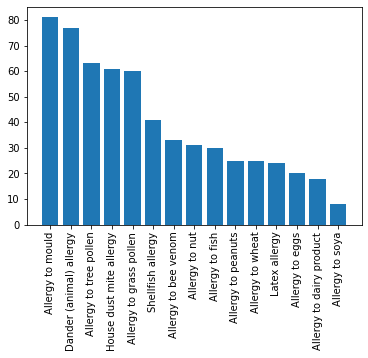

In [ ]:
# distribution in allergies
allergies_distribution = dict(df_allergies["DESCRIPTION"].value_counts())
plt.bar(range(len(allergies_distribution)),list(allergies_distribution.values()),tick_label=list(allergies_distribution.keys()))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# patient and there distribution -- it seems same patient can have multiple allergies
allergy_patients = list(df_allergies["PATIENT"].unique())
print("Number of Unique patients : ", len(allergy_patients))

Number of Unique patients :  141


In [ ]:
# so we take a peak into a simple patient and it has these two allergies proving the above point
print(df_allergies[df_allergies["PATIENT"]==df_allergies["PATIENT"][0]]["DESCRIPTION"])

0        Latex allergy
1    Shellfish allergy
Name: DESCRIPTION, dtype: object


In [ ]:
# let's finally conclude this file by seeing what does encounter reveal us , it should be unique
allergy_encounter = list(df_allergies["ENCOUNTER"].unique())
print("Number of Unique patients : ", len(allergy_encounter))

Number of Unique patients :  141


In [ ]:
print(df_allergies[df_allergies["PATIENT"]==df_allergies["PATIENT"][0]]["ENCOUNTER"])
# nope -- not unique meaning a patient was diagnosed all these allergies on a single visit 
# but it could be possible that for a particular patient the allergies will be encountered at different moments in time

0    b896bf40-8b72-42b7-b205-142ee3a56b55
1    b896bf40-8b72-42b7-b205-142ee3a56b55
Name: ENCOUNTER, dtype: object


Careplans.csv has no role to play as it seems , let's see conditions.csv

# Conditions.csv -- diagnoses of the patient

Parameters :

START = The date the condition was diagnosed.

STOP = The date the condition resolved, if applicable.

PATIENT = Foreign key to the Patient.

ENCOUNTER = Foreign key to the Encounter when the condition was diagnosed.

CODE =  Diagnosis code from SNOMED-CT

DESCRIPTION = Description of the condition.


In [ ]:
# Peak into the data
df_conditions = pd.read_csv("/content/drive/MyDrive/csv/conditions.csv")
df_conditions.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder)
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder)
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder)
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder)


In [ ]:
print(df_conditions.describe())
print("The length of conditions file:",len(df_conditions))
# this is a relatively larger file than the allergies file 
# one thing that comes to my mind is that not every patient can have allergies , it might be possible that only few have those

               CODE
count  8.376000e+03
mean   1.949886e+12
std    2.219533e+13
min    1.734006e+06
25%    5.374101e+07
50%    1.270130e+08
75%    2.833710e+08
max    3.685810e+14
The length of conditions file: 8376


In [ ]:
# so this has the diagnoses of the patient , first let's clear whether the patients in the  allergies and patients here are same patients
# and same with the encounter parameter

conditions_patients = list(df_conditions["PATIENT"].unique())
print("Number of patients in this conditions file : ",len(conditions_patients))

Number of patients in this conditions file :  1152


In [ ]:
# ccommon elements in allergies and diagnosis 
def common(lst1, lst2): 
    return set(set(lst1) & set(lst2))

common_allergies_conditions_patients = common(allergy_patients,conditions_patients)
print("Common patients :",len(common_allergies_conditions_patients)) 

Common patients : 141


In [ ]:
# checking if common allergies_conditions_patients and allergies_patients same
print(sorted(common_allergies_conditions_patients)==sorted(allergy_patients))

True


In [ ]:
# so the deduction here is that all allergy patient are in the condition csv 
# and 1152-141 = 1011 patients didn't suffer from allergies and also it seems same person has multiple diagnosis but not for allergy
# let's see there encounter id in that case

# let's finally conclude this file by seeing what does encounter reveal us , it should be unique
condition_encounter = list(df_conditions["ENCOUNTER"].unique())
print("Number of Unique encounter : ", len(condition_encounter))
# mostly unique encounter id

Number of Unique encounter :  7650


In [ ]:
# there are no na values in encounter
sum(df_conditions["ENCOUNTER"].isna())

0

In [ ]:
print(df_conditions[df_conditions["PATIENT"]==df_conditions["PATIENT"][0]]["ENCOUNTER"])

0     8f104aa7-4ca9-4473-885a-bba2437df588
8     792fae81-a007-44b0-8221-46953737b089
11    4e595f0c-f50f-461b-a04e-13b4e492350e
Name: ENCOUNTER, dtype: object


In [ ]:
# let's pick a patient in allergies same one and see how many encounters it has in this overall diagnosis
print(df_conditions[df_conditions["PATIENT"]==df_allergies["PATIENT"][0]]["ENCOUNTER"])

52    e0d7af4d-903e-4322-a05a-d50dd9fdd0c3
53    08a01d95-8749-4742-b6a8-191e932fd108
54    5505aefd-c09e-44aa-8229-6d5b68f25396
55    9ed30ead-01be-4413-9262-aabdeb59a28a
56    285f1527-0a48-420e-817e-d5010547382b
57    7efe59e5-9519-4a4a-a8b7-5ef99070c540
58    2057671e-9f07-48bf-88f9-2133cc5eff1a
59    ed7e83ff-5c30-4e07-9e3d-fd4b7cc06d0e
60    68b975cc-c01d-42ed-b288-55e5e32bae03
61    d9e93d2a-26e9-4168-bff5-40057868d8e5
62    e5d7f7a0-3e4c-4330-97d1-7551a0e56c5e
63    994b6dd1-e838-46fe-b1d5-52c799a105a7
64    222e18ed-b260-4427-9bb2-1895ac4506d8
Name: ENCOUNTER, dtype: object


In [ ]:
# previously : 

#0    b896bf40-8b72-42b7-b205-142ee3a56b55
#1    b896bf40-8b72-42b7-b205-142ee3a56b55

# these two were for allergies

# now same patient has th  above case with not in them ,let's test more
print(df_conditions[df_conditions["ENCOUNTER"]==df_allergies["ENCOUNTER"][0]])

Empty DataFrame
Columns: [START, STOP, PATIENT, ENCOUNTER, CODE, DESCRIPTION]
Index: []


In [ ]:

# so this encounter for this allergy was not recorded in the conditions.csv
# let's check one more that , the whole condition for the very same patient
df_conditions[df_conditions["PATIENT"]==df_allergies["PATIENT"][0]]

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
52,2010-07-07,2010-07-17,76982e06-f8b8-4509-9ca3-65a99c8650fe,e0d7af4d-903e-4322-a05a-d50dd9fdd0c3,195662009,Acute viral pharyngitis (disorder)
53,2011-08-03,2012-02-29,76982e06-f8b8-4509-9ca3-65a99c8650fe,08a01d95-8749-4742-b6a8-191e932fd108,72892002,Normal pregnancy
54,2012-05-13,2013-11-13,76982e06-f8b8-4509-9ca3-65a99c8650fe,5505aefd-c09e-44aa-8229-6d5b68f25396,65363002,Otitis media
55,2012-07-18,2012-08-08,76982e06-f8b8-4509-9ca3-65a99c8650fe,9ed30ead-01be-4413-9262-aabdeb59a28a,72892002,Normal pregnancy
56,2012-09-24,2012-11-01,76982e06-f8b8-4509-9ca3-65a99c8650fe,285f1527-0a48-420e-817e-d5010547382b,301011002,Escherichia coli urinary tract infection
57,2013-01-09,2013-08-14,76982e06-f8b8-4509-9ca3-65a99c8650fe,7efe59e5-9519-4a4a-a8b7-5ef99070c540,72892002,Normal pregnancy
58,2013-01-07,2013-01-21,76982e06-f8b8-4509-9ca3-65a99c8650fe,2057671e-9f07-48bf-88f9-2133cc5eff1a,444814009,Viral sinusitis (disorder)
59,2014-01-23,2014-01-30,76982e06-f8b8-4509-9ca3-65a99c8650fe,ed7e83ff-5c30-4e07-9e3d-fd4b7cc06d0e,444814009,Viral sinusitis (disorder)
60,2015-03-24,2015-04-03,76982e06-f8b8-4509-9ca3-65a99c8650fe,68b975cc-c01d-42ed-b288-55e5e32bae03,195662009,Acute viral pharyngitis (disorder)
61,2015-11-28,2016-01-02,76982e06-f8b8-4509-9ca3-65a99c8650fe,d9e93d2a-26e9-4168-bff5-40057868d8e5,39848009,Whiplash injury to neck


In [ ]:
df_allergies[df_allergies["PATIENT"]==df_allergies["PATIENT"][0]]

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300916003,Latex allergy
1,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300913006,Shellfish allergy


In [ ]:
# final conclusion is that -- allergies is allergy specific and conditions are actual disorder 
# and combined both are the patients problems

{'Viral sinusitis (disorder)': 1248, 'Acute viral pharyngitis (disorder)': 653, 'Acute bronchitis (disorder)': 563, 'Normal pregnancy': 516, 'Body mass index 30+ - obesity (finding)': 449, 'Prediabetes': 317, 'Hypertension': 302, 'Anemia (disorder)': 300, 'Chronic sinusitis (disorder)': 236, 'Miscarriage in first trimester': 221, 'Otitis media': 196, 'Streptococcal sore throat (disorder)': 157, 'Hyperlipidemia': 136, 'Sprain of ankle': 134, 'Polyp of colon': 79, 'Concussion with no loss of consciousness': 77, 'Diabetes': 76, 'Hypertriglyceridemia (disorder)': 74, 'Metabolic syndrome X (disorder)': 74, 'Acute bacterial sinusitis (disorder)': 69, 'Sinusitis (disorder)': 66, 'Osteoarthritis of knee': 65, 'Coronary Heart Disease': 61, 'Chronic congestive heart failure (disorder)': 57, 'Osteoporosis (disorder)': 57, 'Impacted molars': 57, 'Sprain of wrist': 56, 'Whiplash injury to neck': 55, 'Chronic pain': 55, 'Chronic intractable migraine without aura': 53, 'Drug overdose': 52, 'History o

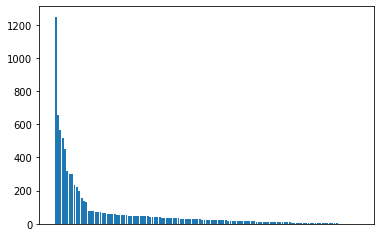

In [ ]:
# distribution in conditions
conditions_distribution = dict(df_conditions["DESCRIPTION"].value_counts())
print(conditions_distribution)
plt.bar(range(len(conditions_distribution)),list(conditions_distribution.values()),tick_label=list(conditions_distribution.keys()))
plt.xticks([],rotation=90)
plt.show()

# Encounter.csv -- Patient encounter data.



In [ ]:
df_encounter = pd.read_csv("/content/drive/MyDrive/csv/encounters.csv")
df_encounter.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder)
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01T15:02:18Z,2001-05-01T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185345009,Encounter for symptom,129.16,129.16,0.00,36971009.0,Sinusitis (disorder)
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28T15:02:18Z,2011-07-28T15:17:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,3dc9bb2d-5d66-3e61-bf9a-e234c6433577,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.00,NaN,NaN
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27T12:58:08Z,2010-07-27T13:28:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,b03dba4f-892f-365c-bfd1-bfcfa7a98d5d,7ed6b84a-b847-3744-9d42-15c42297a0c2,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN


In [ ]:
print("The size of the encounter file : ", df_encounter.shape)

The size of the encounter file :  (53346, 15)


In [ ]:
# ID -- is the UUID id for the patient
encounter_patient  = set(df_encounter["PATIENT"].unique())
print("The number of patients in encounter file : ",len(encounter_patient))

The number of patients in encounter file :  1171


In [ ]:
# in conditions file there were 1152 patients , let's use common function to find out the common patients

common_allergies_encounter_patients = common(allergy_patients,encounter_patient)
print("Common patients :",len(common_allergies_encounter_patients)) 

# checking if common allergies_encounter_patients and allergies_patients same
print(sorted(common_allergies_encounter_patients)==sorted(allergy_patients))

Common patients : 141
True


In [ ]:
common_conditions_encounter_patients = common(encounter_patient,conditions_patients)
print("Common patients :",len(common_conditions_encounter_patients)) 

# checking if common allergies_encounter_patients and allergies_patients same
print(sorted(common_conditions_encounter_patients)==sorted(conditions_patients))

Common patients : 1152
True


In [ ]:
# so some patients are in this file are new , so all allergies patient are in conditions file
# and all condition file patients are in encounter file and some extra

new_encounter_patients = encounter_patient.difference(conditions_patients)
print(len(new_encounter_patients))

19


In [ ]:
for patient in new_encounter_patients:
  print(df_encounter[df_encounter["PATIENT"]==patient]["ENCOUNTERCLASS"])
  print(df_encounter[df_encounter["PATIENT"]==patient]["REASONDESCRIPTION"])

86    wellness
87    wellness
88    wellness
89    wellness
90    wellness
91    wellness
Name: ENCOUNTERCLASS, dtype: object
86    NaN
87    NaN
88    NaN
89    NaN
90    NaN
91    NaN
Name: REASONDESCRIPTION, dtype: object
44089    wellness
44090    wellness
44091    wellness
44092    wellness
44093    wellness
Name: ENCOUNTERCLASS, dtype: object
44089    NaN
44090    NaN
44091    NaN
44092    NaN
44093    NaN
Name: REASONDESCRIPTION, dtype: object
6082    wellness
6083    wellness
6084    wellness
6085    wellness
6086    wellness
6087    wellness
6088    wellness
6089    wellness
6090    wellness
6091    wellness
Name: ENCOUNTERCLASS, dtype: object
6082    NaN
6083    NaN
6084    NaN
6085    NaN
6086    NaN
6087    NaN
6088    NaN
6089    NaN
6090    NaN
6091    NaN
Name: REASONDESCRIPTION, dtype: object
27482    wellness
27483    wellness
27484    wellness
27485    wellness
27486    wellness
27487    wellness
27488    wellness
27489    wellness
27490    wellness
27491    wellness


{'Normal pregnancy': 3779, 'Hyperlipidemia': 2273, 'Viral sinusitis (disorder)': 1378, 'Acute viral pharyngitis (disorder)': 691, 'Acute bronchitis (disorder)': 690, 'Chronic congestive heart failure (disorder)': 620, 'Malignant neoplasm of breast (disorder)': 585, 'Child attention deficit disorder': 287, 'Sinusitis (disorder)': 265, 'Anemia (disorder)': 248, 'Acute bacterial sinusitis (disorder)': 227, 'Asthma': 201, 'Otitis media': 197, 'Childhood asthma': 195, 'Drug overdose': 184, 'Streptococcal sore throat (disorder)': 162, 'Impacted molars': 129, 'Chronic pain': 123, 'Chronic intractable migraine without aura': 121, 'Appendicitis': 100, 'Concussion with no loss of consciousness': 79, 'Osteoarthritis of knee': 65, 'Malignant tumor of colon': 61, 'Major depression disorder': 60, 'Seizure disorder': 59, 'Escherichia coli urinary tract infection': 58, 'Fetus with unknown complication': 50, 'Neoplasm of prostate': 47, 'Fracture of forearm': 45, "Alzheimer's disease (disorder)": 44, 'C

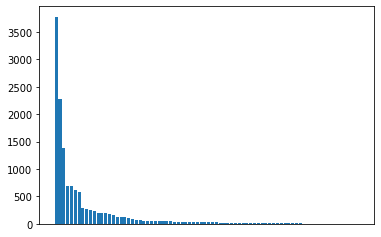

In [ ]:
# interesting observation as wellness checkness or outpatient have no problem detected as it seems
# so patients are in the hospital for allergies and conditions and encounter has all patients but not wellness and outpatient?

# distribution in encounter distribution
encounter_distribution = dict(df_encounter["REASONDESCRIPTION"].value_counts())
print(encounter_distribution)
plt.bar(range(len(encounter_distribution)),list(encounter_distribution.values()),tick_label=list(encounter_distribution.keys()))
plt.xticks([],rotation=90)
plt.show()

In [ ]:
df_conditions[df_conditions["PATIENT"]==df_encounter["PATIENT"][0]]

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
9,2016-12-29,2017-01-05,034e9e3b-2def-4559-bb2a-7850888ae060,3b639086-5fbc-4720-8c31-e8c8c0f1d660,10509002,Acute bronchitis (disorder)


In [ ]:
df_encounter.iloc[0]

Id                     d0c40d10-8d87-447e-836e-99d26ad52ea5
START                                  2010-01-23T17:45:28Z
STOP                                   2010-01-23T18:10:28Z
PATIENT                034e9e3b-2def-4559-bb2a-7850888ae060
ORGANIZATION           e002090d-4e92-300e-b41e-7d1f21dee4c6
PROVIDER               e6283e46-fd81-3611-9459-0edb1c3da357
PAYER                  6e2f1a2d-27bd-3701-8d08-dae202c58632
ENCOUNTERCLASS                                   ambulatory
CODE                                              185345009
DESCRIPTION                           Encounter for symptom
BASE_ENCOUNTER_COST                                  129.16
TOTAL_CLAIM_COST                                     129.16
PAYER_COVERAGE                                        54.16
REASONCODE                                       1.0509e+07
REASONDESCRIPTION               Acute bronchitis (disorder)
Name: 0, dtype: object

In [ ]:
df_encounter[df_encounter["PATIENT"]==df_encounter["PATIENT"][0]]

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder)
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
14,e3639187-450a-4aa9-9fc9-3ea3cafa672b,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
26,3b639086-5fbc-4720-8c31-e8c8c0f1d660,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder)
35,4607e1a1-f2bb-42c8-a2fd-8709331a935d,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,69176529-fd1f-3b3f-abce-a0a3626769eb,c9b3c857-2e24-320c-a79a-87b8a60de63c,6e2f1a2d-27bd-3701-8d08-dae202c58632,outpatient,185349003,Encounter for check up (procedure),129.16,129.16,54.16,NaN,NaN
41,1b3d7c95-f4d3-4dfb-83de-8773f5ce01f7,2018-01-29T17:45:28Z,2018-01-29T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN


# Imaging Studies.csv

In [ ]:
df_imaging = pd.read_csv("/content/drive/MyDrive/csv/imaging_studies.csv")
df_imaging.head()

,Id,DATE,PATIENT,ENCOUNTER,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,SOP_CODE,SOP_DESCRIPTION
0,d3e49b38-7634-4416-879d-7bc68bf3e7df,2014-07-08T15:35:36Z,b58731cc-2d8b-4c2d-b327-4cab771af3ef,3a36836d-da25-4e73-808b-972b669b7e4e,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
1,46baf530-4941-40ab-8219-685a08fd9086,2014-01-22T18:58:37Z,2ffe9369-24e4-414b-8973-258fad09313a,33b71e4b-0690-4fe9-897a-dc3b2ff9215c,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
2,b8fb8a6e-a2f5-46c9-8b3f-a35aa982efcd,2001-12-01T02:08:27Z,86b97fc7-ae8f-4e0d-8e66-db68f36e7a76,e42d1046-568d-46c2-b0a5-d910b2f3bd1d,8205005,Wrist,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
3,10c8a016-4504-4653-bddf-2dd3610886c8,2004-07-03T20:46:46Z,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,323fca87-817f-4d58-8486-ba92ea739399,51299004,Clavicle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
4,4221534c-d379-4c6b-a22e-d7eae3fa2609,2017-02-08T08:42:44Z,d49f748f-928d-40e8-92c8-73e4c5679711,cfef48b3-b769-4794-a3e7-f57f7ba8d387,344001,Ankle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage


In [ ]:
df_imaging.columns

Index(['Id', 'DATE', 'PATIENT', 'ENCOUNTER', 'BODYSITE_CODE',
       'BODYSITE_DESCRIPTION', 'MODALITY_CODE', 'MODALITY_DESCRIPTION',
       'SOP_CODE', 'SOP_DESCRIPTION'],
      dtype='object')

In [ ]:
df_imaging.shape

(855, 10)

# medication.csv

In [ ]:
df_medication = pd.read_csv("/content/drive/MyDrive/csv/medications.csv")
df_medication.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2010-05-05T00:26:23Z,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,1e0d6b0e-1711-4a25-99f9-b1c700c9b260,389221,Etonogestrel 68 MG Drug Implant,677.08,0.0,12,8124.96,NaN,NaN
1,2011-04-30T00:26:23Z,2012-04-24T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,389221,Etonogestrel 68 MG Drug Implant,624.09,0.0,12,7489.08,NaN,NaN
2,2012-04-24T00:26:23Z,2013-04-19T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,7253a9f9-6f6d-429a-926a-7b1d424eae3f,748856,Yaz 28 Day Pack,43.32,0.0,12,519.84,NaN,NaN
3,2011-05-13T12:58:08Z,2011-05-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder)
4,2011-12-08T15:02:18Z,2011-12-22T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder)


In [ ]:
df_medication[df_medication["CODE"]==562251]

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
4,2011-12-08T15:02:18Z,2011-12-22T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder)
8,2019-03-20T15:02:18Z,2019-04-10T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,4e595f0c-f50f-461b-a04e-13b4e492350e,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,29.89,0.0,1,29.89,444814009.0,Viral sinusitis (disorder)
263,2017-11-07T02:08:27Z,2017-11-21T02:08:27Z,86b97fc7-ae8f-4e0d-8e66-db68f36e7a76,6e2f1a2d-27bd-3701-8d08-dae202c58632,ca34b3e7-c5f2-4c27-b668-480705750d79,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,46.93,0.0,1,46.93,444814009.0,Viral sinusitis (disorder)
388,2020-03-10T14:32:49Z,2020-03-31T14:32:49Z,518f83f3-a717-4705-a181-06e205df480b,4d71f845-a6a9-3c39-b242-14d25ef86a8d,ef520d69-8569-4b68-8271-4ff89e7ab20a,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,82.94,0.0,1,82.94,444814009.0,Viral sinusitis (disorder)
508,2015-05-25T20:01:32Z,2015-06-15T20:01:32Z,2c634692-05d8-4122-9f46-dd9402e2cfc6,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,c9f1bb8e-e498-419a-b868-59815552379e,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,49.02,0.0,1,49.02,444814009.0,Viral sinusitis (disorder)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42238,2013-08-14T12:14:09Z,2013-08-21T12:14:09Z,8caa111c-92a3-43df-973d-fc60735b9832,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,b35110b5-20b7-4ebf-84c5-62bf97ed94a3,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,100.45,0.0,1,100.45,444814009.0,Viral sinusitis (disorder)
42246,1953-10-01T05:05:25Z,1953-10-08T05:05:25Z,b940dd35-39e3-49d9-918a-316db1e223e3,047f6ec3-6215-35eb-9608-f9dda363a44c,cdc29763-a278-42a8-94a9-103ac5033481,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.62,0.0,1,11.62,444814009.0,Viral sinusitis (disorder)
42300,2020-04-05T20:02:50Z,2020-04-19T20:02:50Z,1bacaab1-708b-42fe-8f12-fbe97a725440,7caa7254-5050-3b5e-9eae-bd5ea30e809c,6787a41a-ef0d-4d94-86b8-d12027c4611a,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,46.76,0.0,1,46.76,444814009.0,Viral sinusitis (disorder)
42401,2018-06-28T04:37:39Z,2018-07-12T04:37:39Z,73fc00f8-a341-4f62-be27-07c35c3460bc,7caa7254-5050-3b5e-9eae-bd5ea30e809c,0c4043fa-87f3-4cfd-98a3-00c8aef38434,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,22.14,0.0,1,22.14,75498004.0,Acute bacterial sinusitis (disorder)


In [ ]:
df_medication.shape

(42989, 13)

In [ ]:
# this matches with the previous deducations
df_conditions[df_conditions["ENCOUNTER"]=="e1ab4933-07a1-49f0-b4bd-05500919061d"]

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)


# Patients.csv

In [ ]:
df_patient = pd.read_csv("/content/drive/MyDrive/csv/patients.csv")
df_patient.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,white,hispanic,M,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,NaN,M,white,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,NaN,M,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,Williamson769,M,white,nonhispanic,F,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20


In [ ]:
df_patient["RACE"].unique()

array(['white', 'native', 'asian', 'black', 'other'], dtype=object)